In [1]:
import os
import pickle

import matplotlib.pyplot as plt
import numpy as np

In [2]:
import pandas as pd

In [9]:
users_data = dict()
for user in os.listdir("FaceEngageDataset/"):
    valence_df = pd.DataFrame(index=pd.RangeIndex(10000))
    arousal_df = pd.DataFrame(index=pd.RangeIndex(10000))
    for segment in os.listdir(f"FaceEngageDataset/{user}"):
        if not segment.endswith("pkl"):
            continue
        data = pickle.load(open(f"FaceEngageDataset/{user}/{segment}", "rb"))
        segment = segment.replace(".pkl", "")
        idx = data["Frame Index"]
        valence_df[segment] = None
        valence_df[segment].loc[idx] = data["Valence"]
        
        arousal_df[segment] = None
        arousal_df[segment].loc[idx] = data["Arousal"]
    valence_df.dropna(inplace=True, how="all")
    arousal_df.dropna(inplace=True, how="all")
    
    users_data[user] = {"valence": valence_df,
                        "arousal": arousal_df}

In [49]:
def plot_time_vs_metric(metric):
    users = [u for u, v in users_data.items() if len(v[metric])]
    n = len(users)
    ncols = 3
    nrows = int(np.ceil(n/ncols))
    fig, axs = plt.subplots(nrows, ncols, constrained_layout=True, figsize=(16, 16))
    
    for i, u in enumerate(users):
        df = pd.DataFrame(users_data[u][metric])
        x = np.array(df.index)
        mean = df.mean(axis=1)
        std = df.std(axis=1)
        
        ax = axs.flat[i]
        ax.plot(x, mean)
        ax.fill_between(x=x, y1=(mean-std).astype(float), y2=(mean+std).astype(float), alpha=0.1)
        ax.set_title(f"{metric} of user {u}".title())
        
    return fig

# User valence-arousal profiles accross different segments

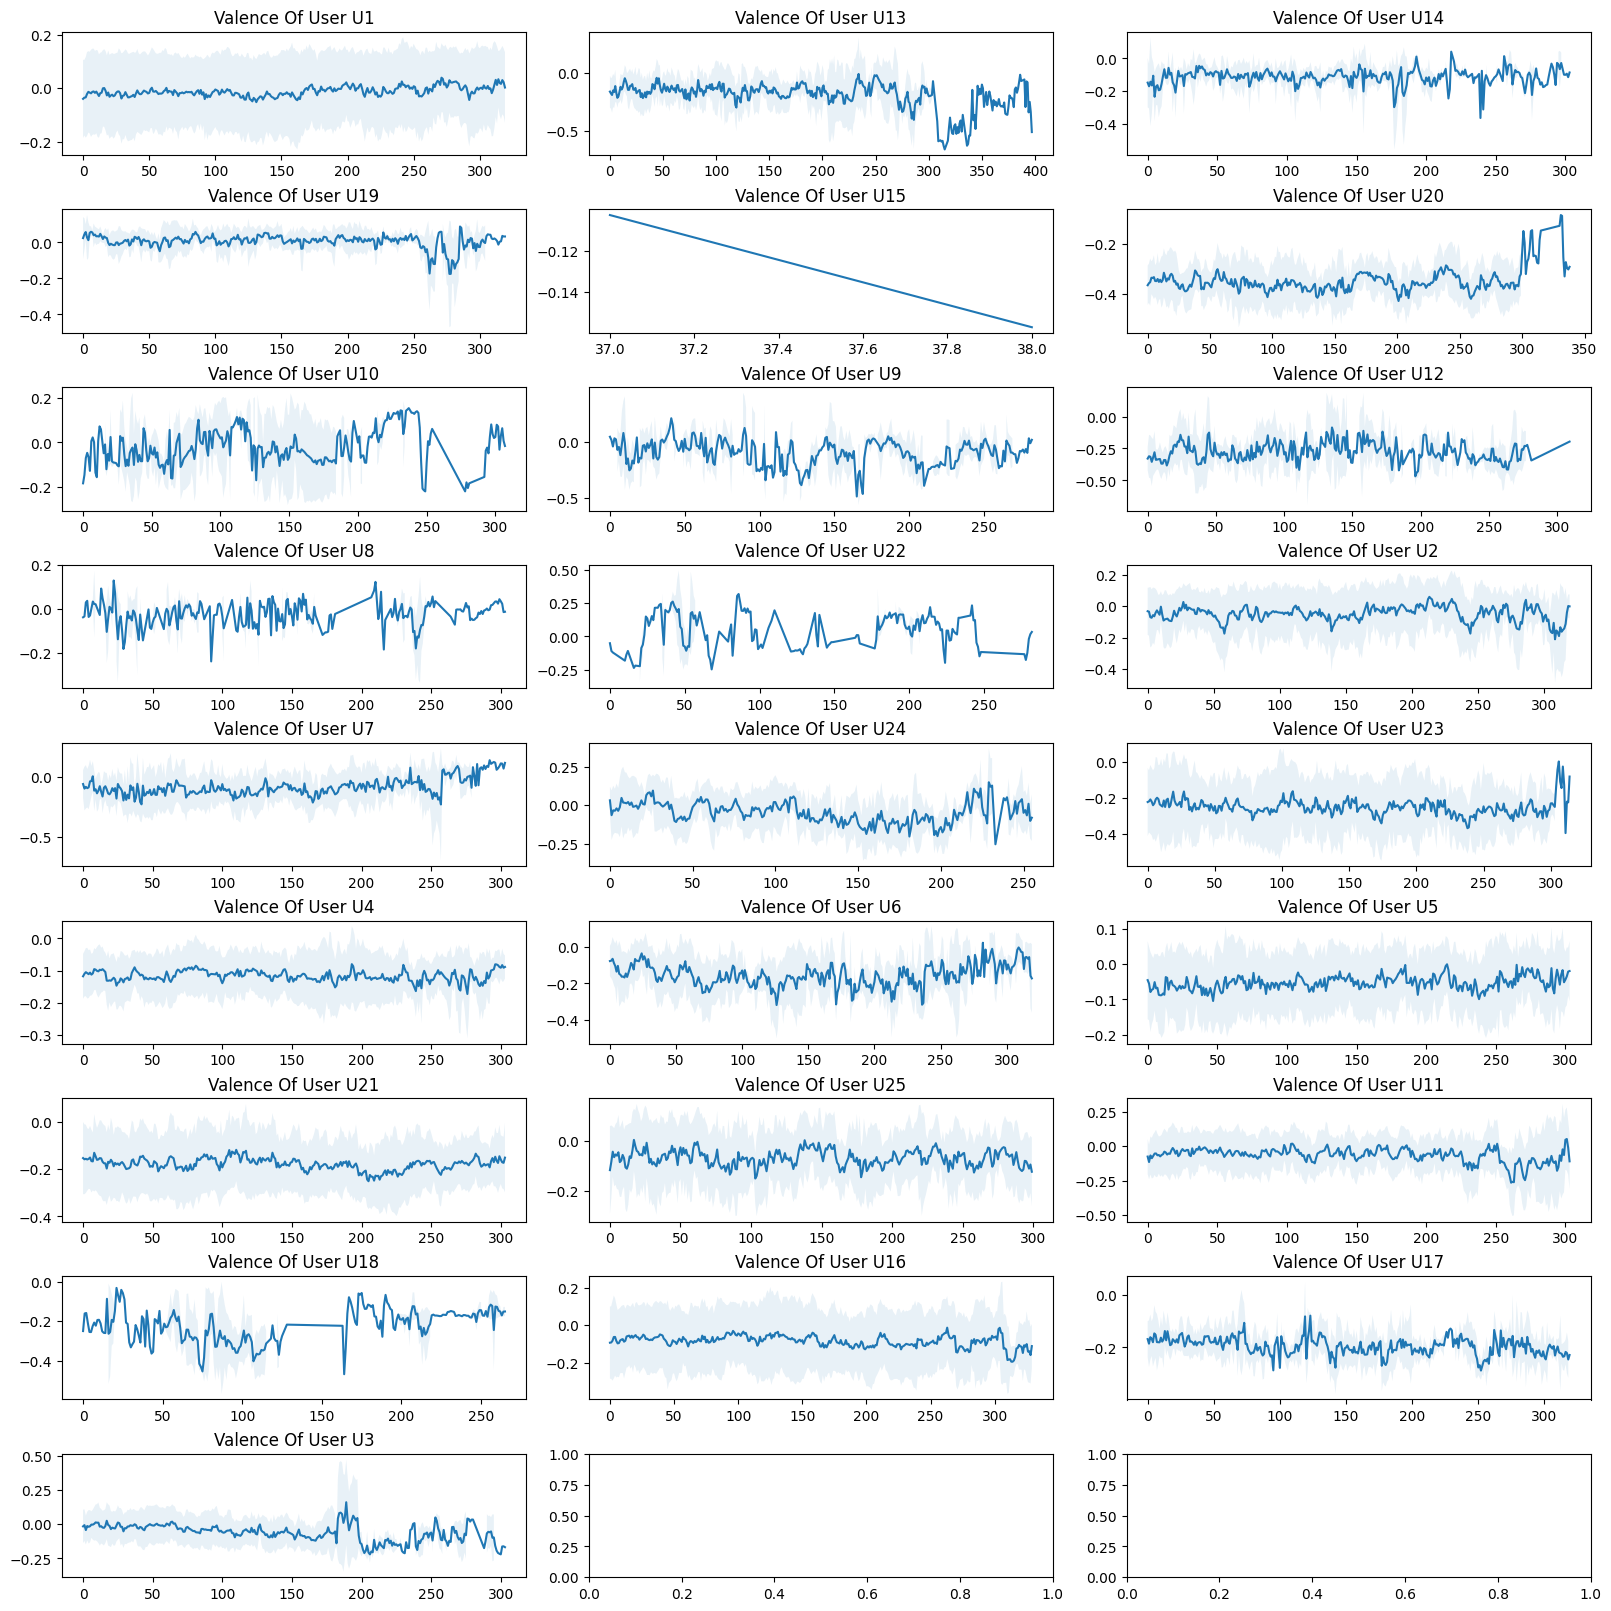

In [50]:
plot_time_vs_metric("valence");

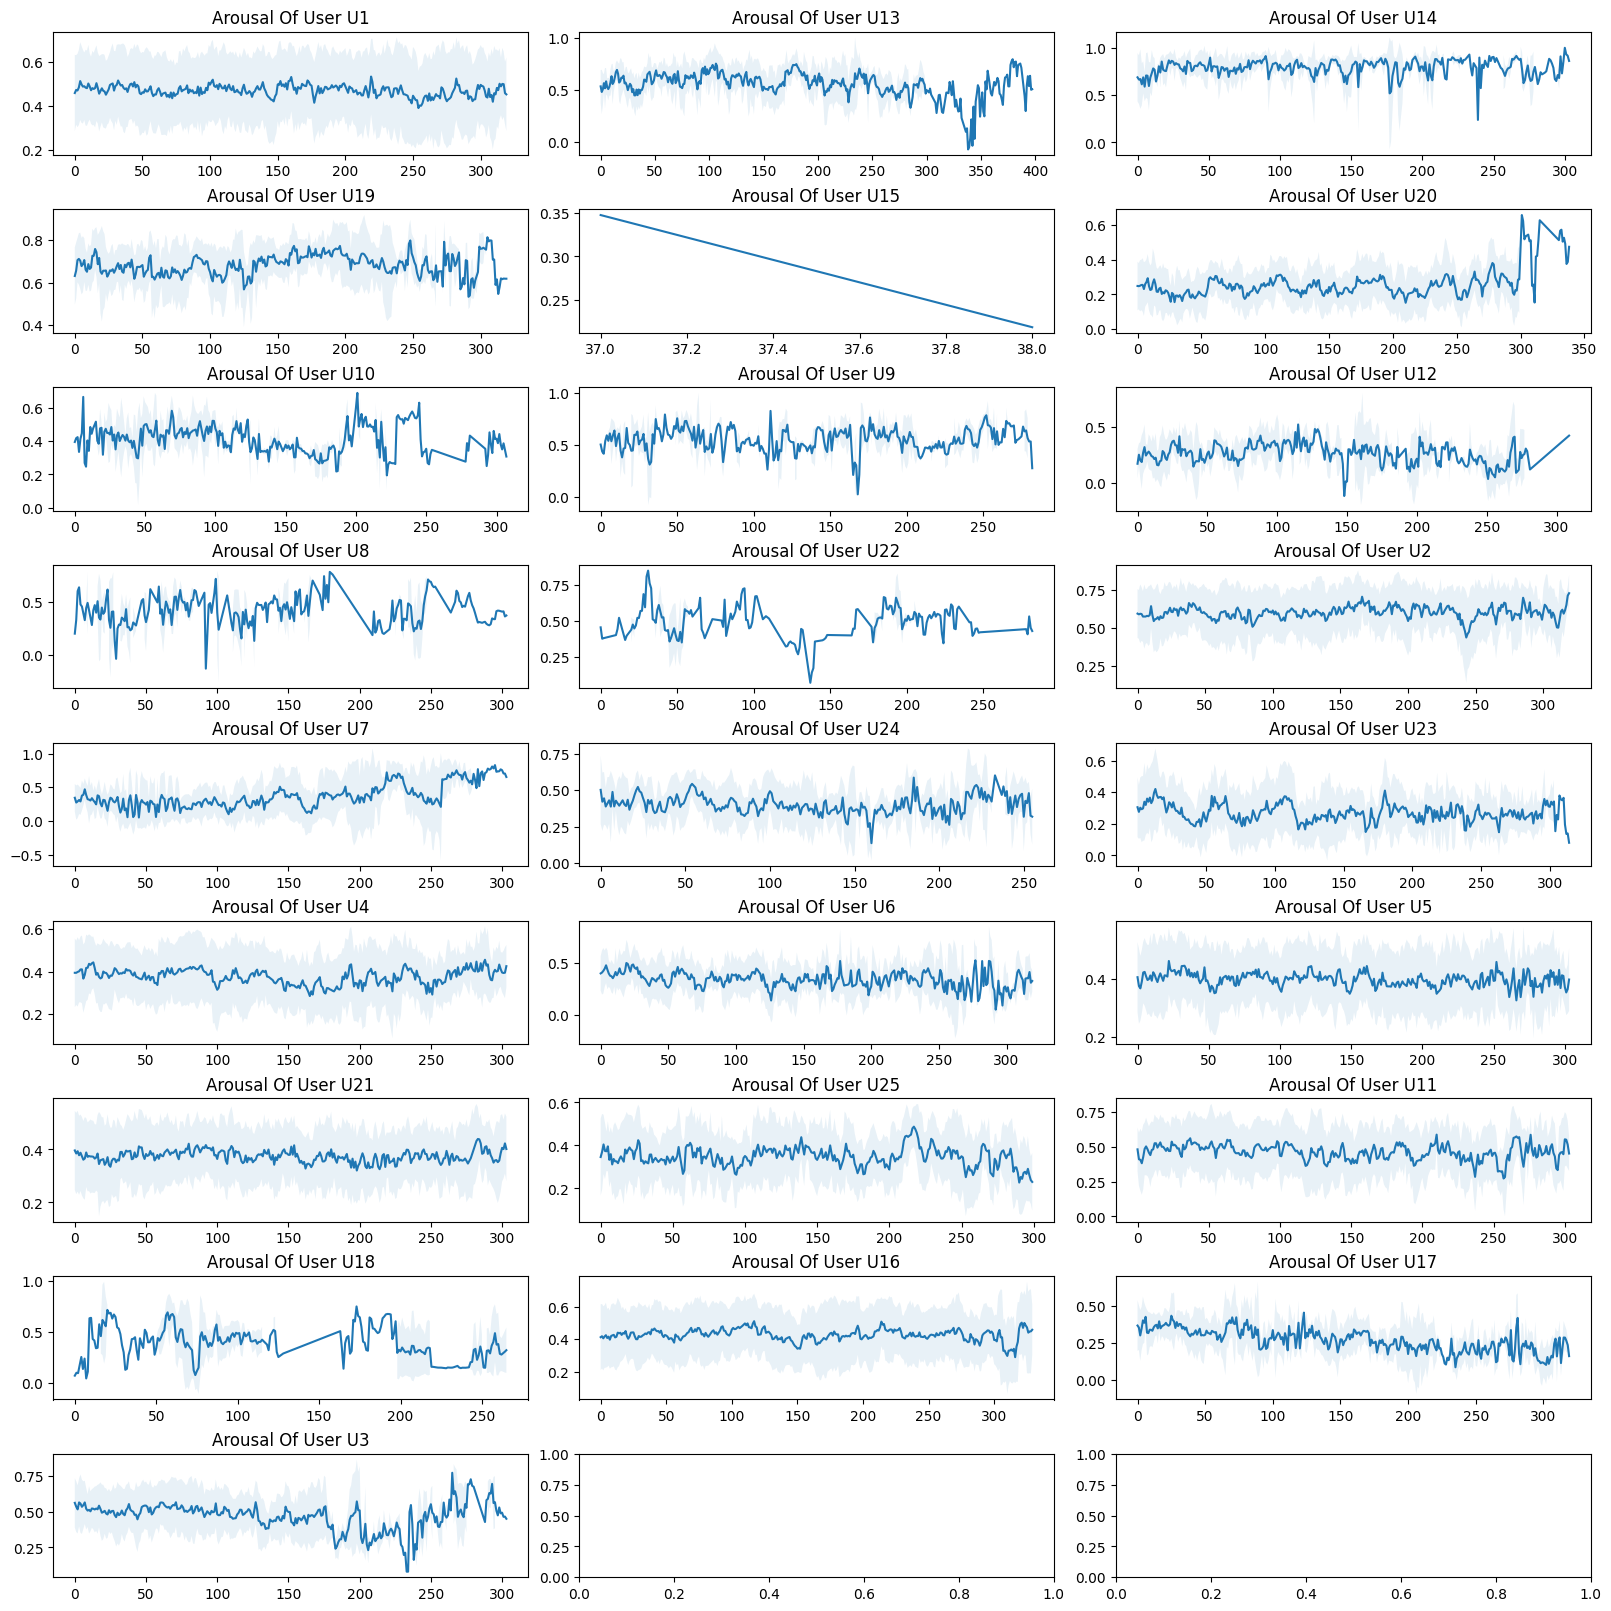

In [51]:
plot_time_vs_metric("arousal");

# Clustering gameplay segments?

- We represent a segment with the sequence of valence and arousal scores.
- We interpolate the missing valence and arousal scores when a face is not detected.
- We expect to see different clusters align with different player activity. (high vs low engagement)